In [6]:
import os
import time
import tensorflow as tf
from tensorflow.keras.datasets import cifar10, mnist
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras import (
    models,
    layers,
) 
from matplotlib import pyplot as plt
import numpy as np
import random
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [7]:
model_directory = 'models'

In [8]:
class RandomIntegers():
    def __init__(self):
        pass
    
    def generate(self, n, length):
        # Generate n unique random integers between 0 and length
        random_integers = random.sample(range(length), n)
        
        return random_integers

In [9]:
(x_train,y_train), (x_test, y_test)= mnist.load_data()

## Plot Dataset

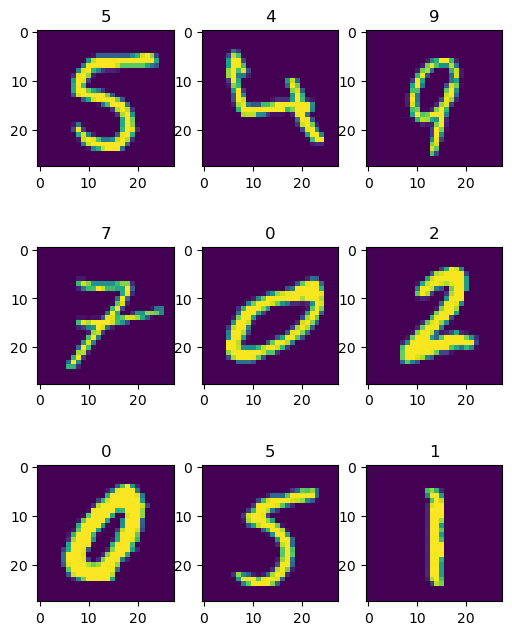

In [15]:
def display_images():
    random_integers = RandomIntegers().generate(9, len(x_train))
    plt.figure(figsize=(6, 8))
    counter = 0
    for i in random_integers:
        # define subplot
        plt.subplot(330 + 1 + counter)
        counter += 1
        # plot raw pixel data
        plt.imshow(x_train[i])
        plt.title(str(y_train[i]))
    # show the figure
    plt.show()
display_images()

In [16]:
x_train.shape

(60000, 28, 28)

In [17]:
# Normalize the pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape the input data to have a single channel
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

### Build Model

In [ ]:
model = tensorflow.keras.models.Sequential([
    
    tensorflow.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tensorflow.keras.layers.Dense(128, 
                                  activation='relu', 
                                  kernel_initializer=tf.keras.initializers.GlorotUniform()
                                 ),
    # tensorflow.keras.layers.Dense(32, activation='relu'),
    tensorflow.keras.layers.Dense(10, 
                                  activation='softmax',
                                  kernel_initializer=tf.keras.initializers.GlorotUniform()
                                 )
])

In [18]:
# Define the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


### Compile the model

In [19]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

### Model Training

In [20]:
start_time = time.time()
history = model.fit(x_train,
                    y_train,
                    epochs=25,
                    batch_size=512,
                    validation_data=(x_test, y_test))
end_time = time.time()
total_time = end_time - start_time

print("Time taken for training: ", total_time, " seconds")

Epoch 1/25


/Users/binilkuriachan/anaconda3/envs/ail-411-env/lib/python3.9/site-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


118/118 [==============================] - 4s 22ms/step - loss: 0.4754 - sparse_categorical_accuracy: 0.8660 - val_loss: 0.1319 - val_sparse_categorical_accuracy: 0.9619
Epoch 2/25
118/118 [==============================] - 2s 18ms/step - loss: 0.1059 - sparse_categorical_accuracy: 0.9686 - val_loss: 0.0742 - val_sparse_categorical_accuracy: 0.9761
Epoch 3/25
118/118 [==============================] - 2s 17ms/step - loss: 0.0761 - sparse_categorical_accuracy: 0.9770 - val_loss: 0.0598 - val_sparse_categorical_accuracy: 0.9808
Epoch 4/25
118/118 [==============================] - 2s 18ms/step - loss: 0.0631 - sparse_categorical_accuracy: 0.9811 - val_loss: 0.0589 - val_sparse_categorical_accuracy: 0.9809
Epoch 5/25
118/118 [==============================] - 2s 17ms/step - loss: 0.0530 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.0517 - val_sparse_categorical_accuracy: 0.9837
Epoch 6/25
118/118 [==============================] - 2s 17ms/step - loss: 0.0473 - sparse_categorical_acc

### Plot Accuracy

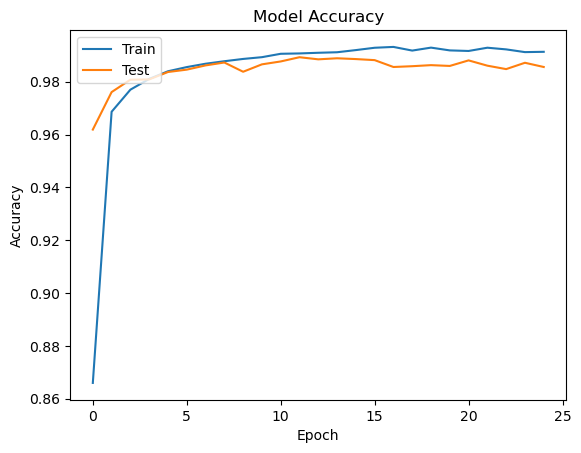

In [21]:
# Plot the accuracy from the training history
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Plot loss

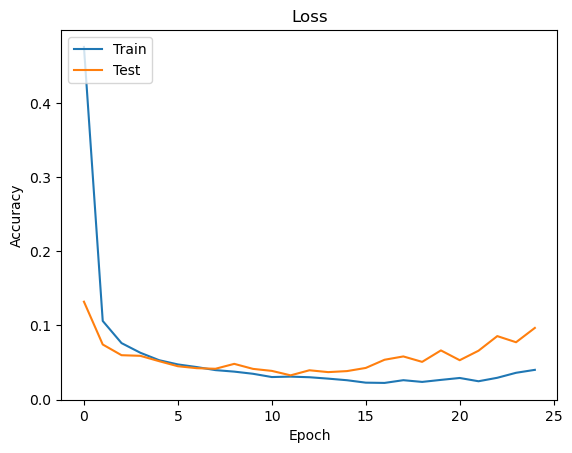

In [22]:
# Plot the accuracy from the training history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Save Model

In [23]:
if not os.path.exists(model_directory):
    os.makedirs(model_directory)
model_path = os.path.join(model_directory,"model_mnist_cnn.h5")
model.save(model_path)

/Users/binilkuriachan/anaconda3/envs/ail-411-env/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [29]:
# Get the true labels and predicted labels for the test dataset
true_labels = y_test
predicted_labels = np.argmax(model.predict(x_test), axis=-1)


313/313 [==============================] - 1s 2ms/step


### Confusion Matrix

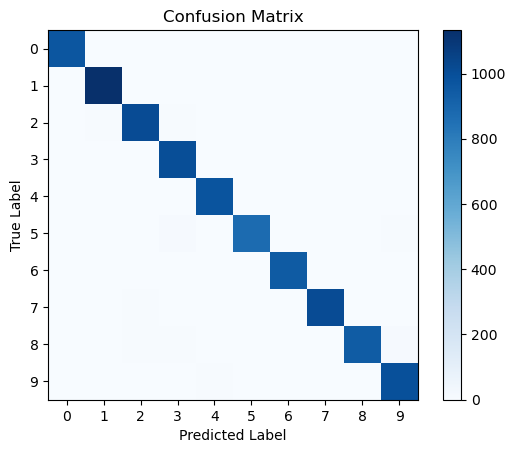

In [30]:
# Generate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.show()

In [32]:
cm

array([[ 967,    1,    2,    0,    1,    1,    4,    2,    2,    0],
       [   0, 1133,    1,    1,    0,    0,    0,    0,    0,    0],
       [   0,    5, 1012,    6,    1,    0,    1,    3,    3,    1],
       [   0,    0,    1, 1003,    0,    4,    0,    0,    2,    0],
       [   0,    1,    0,    0,  977,    0,    1,    1,    1,    1],
       [   2,    0,    0,    9,    0,  872,    1,    1,    1,    6],
       [   2,    3,    0,    0,    3,    4,  944,    0,    2,    0],
       [   0,    4,    6,    0,    0,    0,    0, 1013,    1,    4],
       [   4,    0,    7,    5,    1,    2,    1,    4,  940,   10],
       [   2,    0,    0,    2,    6,    2,    0,    1,    1,  995]])

### Classification Report

In [33]:
# Generate the classification report
report = classification_report(true_labels, predicted_labels, target_names=cifar_10_labels.values(),)

# Print the classification report
print(report)

              precision    recall  f1-score   support

    airplane       0.99      0.99      0.99       980
  automobile       0.99      1.00      0.99      1135
        bird       0.98      0.98      0.98      1032
         cat       0.98      0.99      0.99      1010
        deer       0.99      0.99      0.99       982
         dog       0.99      0.98      0.98       892
        frog       0.99      0.99      0.99       958
       horse       0.99      0.99      0.99      1028
        ship       0.99      0.97      0.98       974
       truck       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

